In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_path = r"C:\Users\arthur.oliveira\OneDrive\Codes\Database\Games\Video_Games.csv"
df = pd.read_csv(folder_path)

In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.info()

In [3]:
df.dropna(subset=['Name','Year_of_Release'],inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


In [5]:

df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

In [6]:
df['User_Score'] = df['User_Score'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


In [8]:
# VER VALORES UNICOS 
valores_unicos = df['Genre'].unique()

print(valores_unicos)


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [9]:
# VER VALORES UNICOS 
valores_unicos2 = df['Platform'].unique()

print(valores_unicos2)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


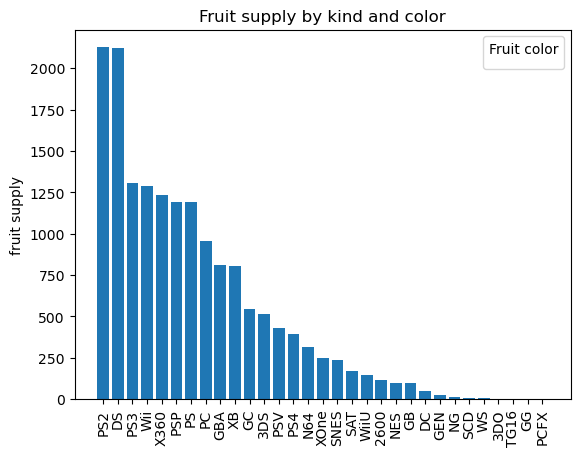

In [10]:
fig, ax = plt.subplots()
contagem = df['Platform'].value_counts()
ax.bar(contagem.index, contagem.values)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')
plt.xticks(rotation=90)
plt.show()

In [12]:
df2= df.query('2000 <= Year_of_Release <= 2015')
df2  = df2.head(100)

In [13]:
# agrupei por Ano para poder mostrar no grafico o eixo x de 3 em 3 anos
df2_group_year = df2.groupby(['Year_of_Release']).sum()

C:\Users\arthur.oliveira\AppData\Local\Temp\ipykernel_18888\3019020875.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_group_year = df2.groupby(['Year_of_Release']).sum()


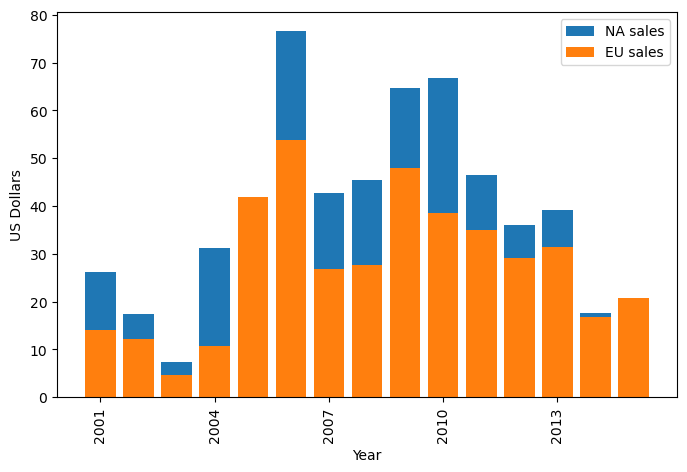

In [14]:
#plota como figura, adiciona dimensoes para a plotagem
plt.figure(figsize=(8,5))

#plota grafico
plt.bar(df2_group_year.index, df2_group_year.NA_Sales, label='NA sales')
plt.bar(df2_group_year.index, df2_group_year.EU_Sales, label='EU sales')

#altera eixo x
plt.xticks(df2_group_year.index[::3],rotation=90)

# Adiciona titulo aos eixos
plt.xlabel('Year')
plt.ylabel('US Dollars')

#adiciona legenda
plt.legend()


In [15]:
df2_group_year.index[::3]

Float64Index([2001.0, 2004.0, 2007.0, 2010.0, 2013.0], dtype='float64', name='Year_of_Release')

In [16]:
df2_group_year.index

Float64Index([2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
              2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0],
             dtype='float64', name='Year_of_Release')

In [17]:
df2_group_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,,,,,,,,,
2001.0,26.14,14.01,6.37,3.08,49.63,473.0,269.0,43.3,3885.0
2002.0,17.40,12.14,6.02,3.27,38.83,183.0,91.0,17.2,865.0
2003.0,7.39,4.60,0.95,1.21,14.15,85.0,33.0,8.6,171.0
2004.0,31.32,10.68,6.04,20.59,68.65,361.0,284.0,34.3,3210.0
2005.0,33.99,41.98,22.71,11.07,109.76,493.0,326.0,47.3,1253.0
2006.0,76.72,53.88,19.84,16.21,166.65,318.0,230.0,32.1,2540.0
2007.0,42.70,26.76,9.56,8.32,87.33,593.0,404.0,55.3,8981.0
2008.0,45.54,27.57,9.78,8.81,91.72,631.0,524.0,56.4,11677.0
2009.0,64.65,47.91,15.14,12.91,140.59,666.0,554.0,60.8,11792.0
